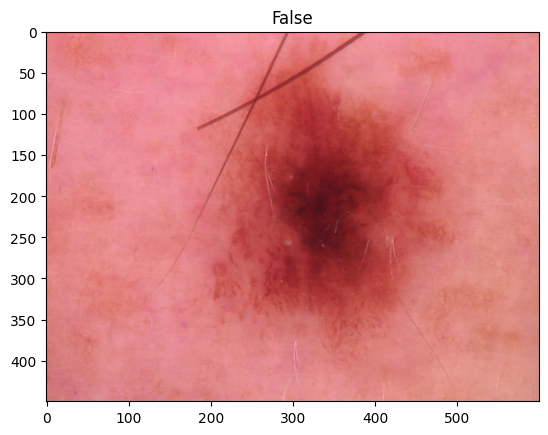

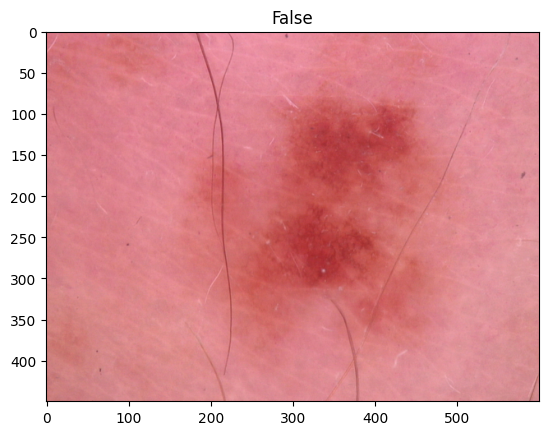

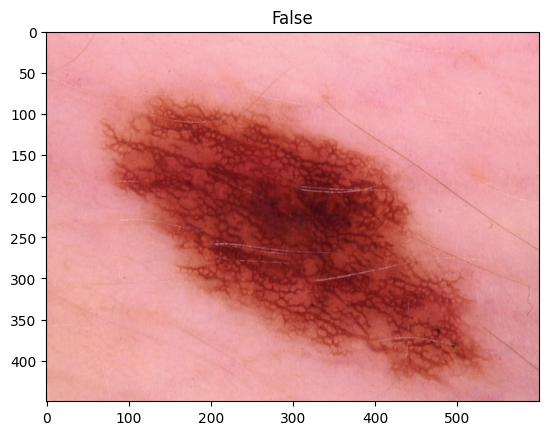

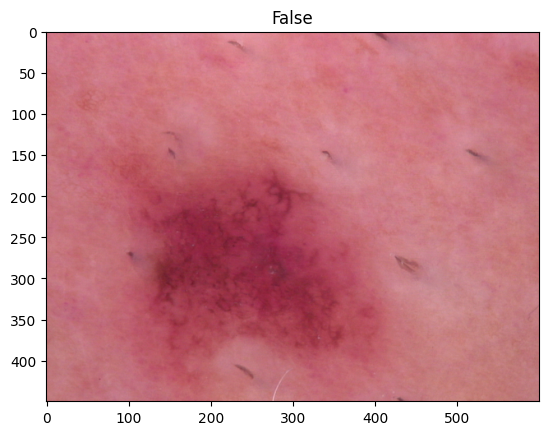

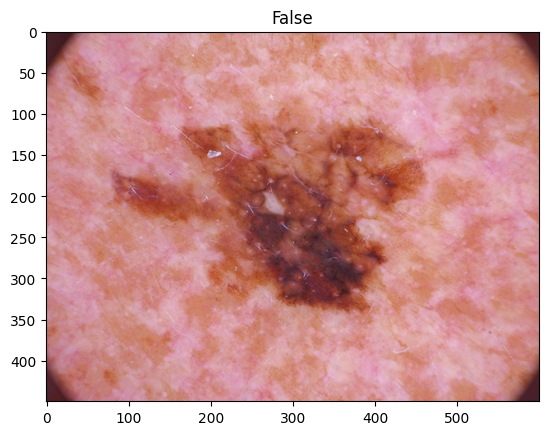

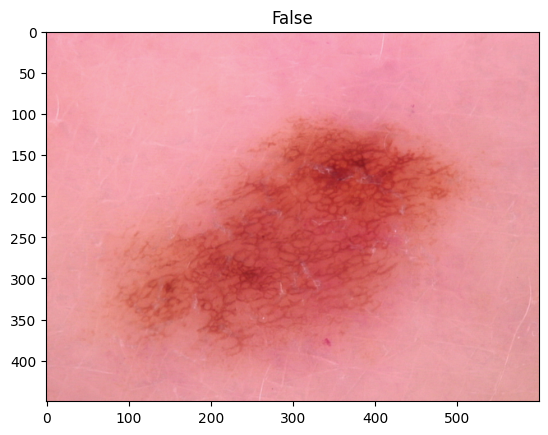

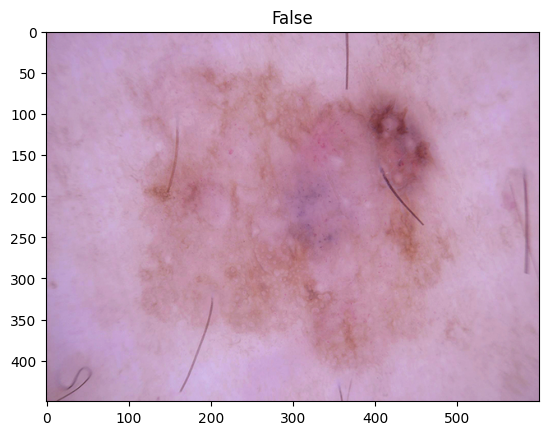

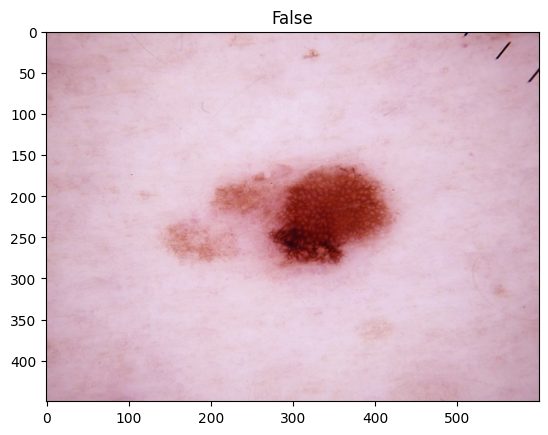

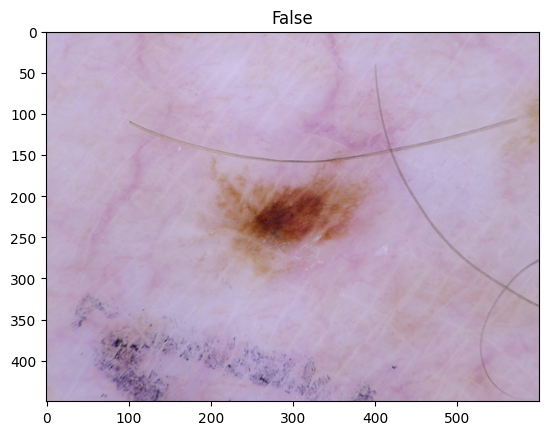

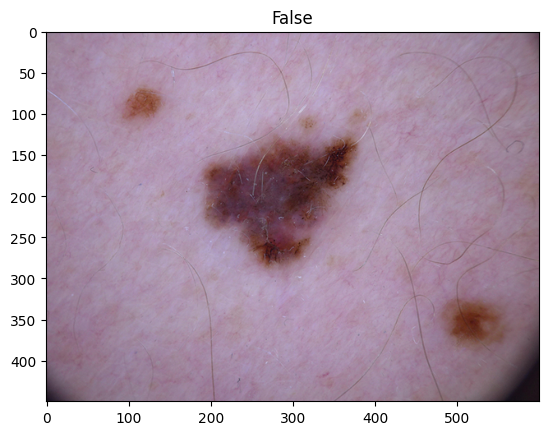

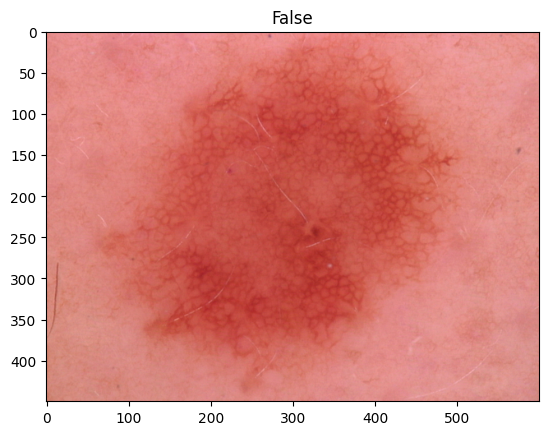

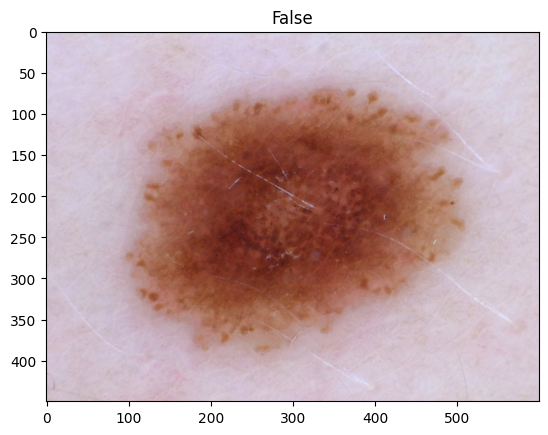

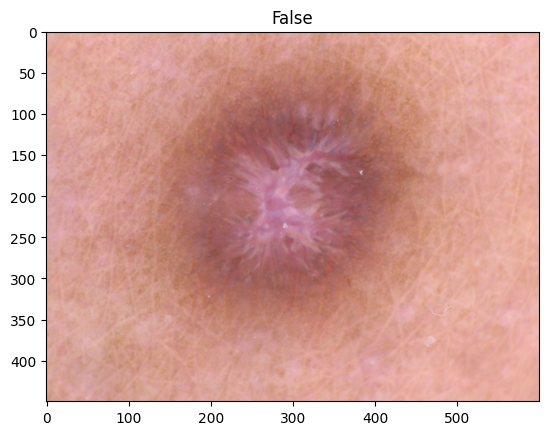

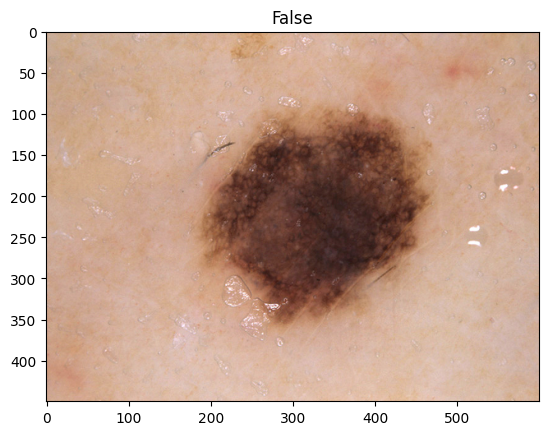

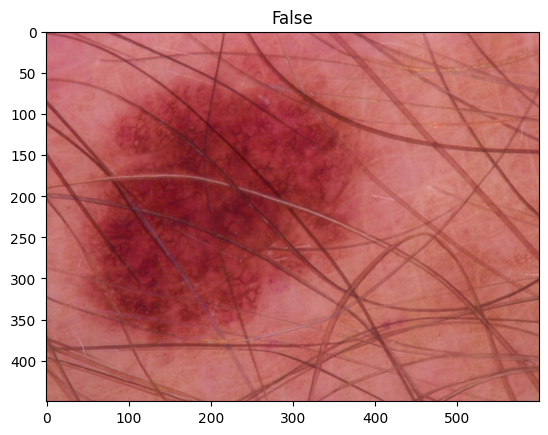

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

# Load the dataset
df = pd.read_csv('GroundTruth.csv')

# Define the directory where the images are stored
img_dir = '/content/Images/'

# Iterate over the rows of the dataset and display each image
for index, row in df.iterrows():
    img_path = img_dir + row['image'] + '.jpg'
    img = io.imread(img_path)
    plt.imshow(img)
    plt.title(row[['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].all())
    plt.show()

In [2]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=fc4f7fabd89529f6636069f72a8588343f2a965a4d0aaa806939a91b1ea09f42
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 1.9848 - accuracy: 0.0833 - val_loss: 1.6410 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 2.1956 - accuracy: 0.6667 - val_loss: 0.6277 - val_accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 1.3283 - accuracy: 0.7500 - val_loss: 0.9646 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 1.9027 - accuracy: 0.0833 - val_loss: 1.2556 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.7393 - accuracy: 0.1667 - val_loss: 1.3504 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 1.2404 - accuracy: 0.6667 - val_loss: 1.1251 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.1781 - accuracy: 0.6667 - val_loss: 1.0310 - val_accuracy: 0.6667
Epoch 8/10
1/1 [=========================

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 510ms/step


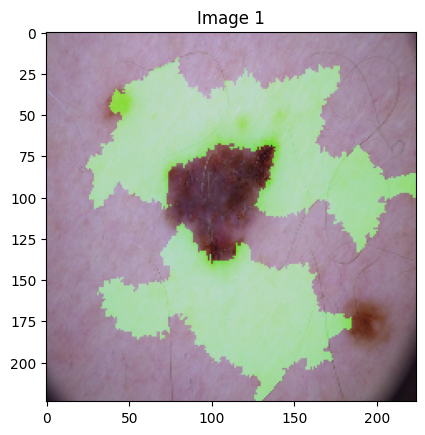

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from lime import lime_image
import matplotlib.pyplot as plt

# Load the GroundTruth.csv dataset
data_df = pd.read_csv('GroundTruth.csv')

# Set the image size and path to the Images folder
IMG_SIZE = 224
IMG_PATH = 'Images/'

# Create a function to load and preprocess images
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.
    return img

# Load and preprocess the images and labels
images = []
labels = []
for index, row in data_df.iterrows():
    img_path = os.path.join(IMG_PATH, row['image']+'.jpg')
    images.append(load_image(img_path))
    labels.append([row['MEL'], row['NV'], row['BCC'], row['AKIEC'], row['BKL'], row['DF'], row['VASC']])
images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)

# Use LIME to explain model predictions for images (CHANGE NUMBER BELOW IN RANGE TO PLOT MORE IMAGES - Here we've taken 1 Image for Plotting)
explainer = lime_image.LimeImageExplainer()
for i in range(1):
    explanation = explainer.explain_instance(X_val[i], model.predict, top_labels=3, hide_color=0, num_samples=1000)
    explanation_image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(explanation_image)
    plt.title(f'Image {i+1}')
    plt.show()

In [5]:
# EXPLAINATION

# The code above trains a convolutional neural network (CNN) on a skin lesion classification task using the ISIC (International Skin Imaging Collaboration) dataset. Once the model is trained, it is used with the LimeImageExplainer class from LIME (Local Interpretable Model-Agnostic Explanations) library to generate an explanation for the classification of a specific image in the validation set.
# The explanation is generated by creating a perturbed version of the input image and observing how the output of the model changes. The LimeImageExplainer class provides a function called explain_instance which takes the input image, the predict function of the model, and some optional parameters as inputs, and returns an explanation object. The explanation object contains information about the image regions that the model considers most important for the prediction.
# In the code above, the explain_instance function is called with the first image in the validation set (X_val[0]) and the model.predict function as inputs. The top_labels parameter is set to 3, which means that the top 3 predicted labels will be explained. The hide_color parameter is set to 0, which means that the image regions that are not important for the prediction will be masked out. The num_samples parameter is set to 1000, which means that 1000 perturbed versions of the input image will be generated.
# The resulting explanation is then used to create an explanation image and mask. The get_image_and_mask function is called on the explanation object with the top predicted label (explanation.top_labels[0]) and some optional parameters. The function returns an explanation image that highlights the important regions for the prediction and a mask that shows which regions of the image were used to generate the explanation.
# Therefore, the generated explanation image shows the regions of the skin lesion that the model considered most important for predicting the class. By looking at the explanation image, we can understand which specific features of the lesion the model is focusing on when making the prediction.